# Factors Influencing Hotel Cancellations

## Observations/Analysis
- the model predicts hotel cancellations with 77.4% accuracy
- pandas get dummies function made easy work of converting multiple columns of categorical data at once
- I chose to limit the number of epochs to 20 after viewing the original 100. The accuracy (and loss) changed only slightly after epoch 6
- when plotted together, about 77% of the data do appear to be accurately predicted

## Obstacles/Issues Encountered
- Using the pandas get dummies to convert the categorical data changed the number of feature to be used. Each value became its own column. Doing it this way, could have amde for a huge number of culms depending on the number of different values of categorical data in each column. 
- Using categorical_cross entropy to calculate loss resulted in a fairly high loss of .45, however binary crossentropy resulted in an even higher loss


## Dependencies and Setup

In [1]:
# bring in pandas

import pandas as pd
import matplotlib.pyplot as plt
import numpy
import random

In [2]:
# bring in the data file

df = pd.read_csv("hotel_bookings.csv")
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [3]:
# show the list of columns (there are too many to just look at the dataframe)

list(df.columns)

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

In [4]:
# show the correlations between numerical columns to see which ones are most likely to generate good predicitons

df.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005048,-0.032491,-0.084793,0.110133,-0.057358,-0.144381,-0.083114,-0.020642,0.054186,0.047557,-0.195498,-0.234658
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037622,-0.020915,-0.124410,0.086042,-0.073548,0.000149,-0.069741,0.151464,0.170084,-0.063077,-0.116451,-0.095712
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054624,-0.013192,0.010341,-0.119822,0.029218,0.030872,0.063457,0.259095,-0.056497,0.197580,-0.013684,0.108531
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005518,0.010395,-0.030131,0.035501,-0.020904,0.005508,-0.031201,-0.076760,0.022933,0.075791,0.001920,0.026149
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014544,-0.000230,-0.006145,-0.027011,-0.000300,0.010613,0.001487,0.044858,0.022728,0.030245,0.008683,0.003062
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045793,0.018483,-0.087239,-0.012775,-0.042715,0.063281,0.140739,0.066749,-0.054151,0.049342,-0.018554,0.072671
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,-0.097245,-0.013992,-0.048743,0.096209,0.182382,0.182211,-0.002020,0.065237,-0.024859,0.068192
adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030447,0.018146,-0.146426,-0.006738,-0.107983,-0.051673,-0.035594,0.207793,-0.008283,0.230641,0.014785,0.122884
children,0.005048,-0.037622,0.054624,0.005518,0.014544,0.045793,0.044203,0.030447,1.000000,0.024030,-0.032859,-0.024730,-0.021072,0.048949,0.041066,0.030931,-0.033273,0.324854,0.056253,0.081745
babies,-0.032491,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,-0.008943,-0.007501,-0.006550,0.083440,0.036184,0.019206,-0.010621,0.029186,0.037383,0.097889


In [5]:
# make a new dataframe with only the columns chosen to make the predictions

hotel_df = df[["is_canceled", "lead_time", "previous_cancellations", "total_of_special_requests", "deposit_type", "customer_type"]]
hotel_df

,is_canceled,lead_time,previous_cancellations,total_of_special_requests,deposit_type,customer_type
0,0,342,0,0,No Deposit,Transient
1,0,737,0,0,No Deposit,Transient
2,0,7,0,0,No Deposit,Transient
3,0,13,0,0,No Deposit,Transient
4,0,14,0,1,No Deposit,Transient
...,...,...,...,...,...,...
119385,0,23,0,0,No Deposit,Transient
119386,0,102,0,2,No Deposit,Transient
119387,0,34,0,4,No Deposit,Transient
119388,0,109,0,0,No Deposit,Transient


In [6]:
# use pandas get dummies to convert the categorical columns into numeric values

encoded_hotel_df = pd.get_dummies(hotel_df)
encoded_hotel_df

,is_canceled,lead_time,previous_cancellations,total_of_special_requests,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,342,0,0,1,0,0,0,0,1,0
1,0,737,0,0,1,0,0,0,0,1,0
2,0,7,0,0,1,0,0,0,0,1,0
3,0,13,0,0,1,0,0,0,0,1,0
4,0,14,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,0,0,1,0,0,0,0,1,0
119386,0,102,0,2,1,0,0,0,0,1,0
119387,0,34,0,4,1,0,0,0,0,1,0
119388,0,109,0,0,1,0,0,0,0,1,0


## Data Preprocessing

In [7]:
# reformat the data

data = encoded_hotel_df.values
X = data[:, 1:]
y = data[:, 0]

In [8]:
# display it to make sure it is what I expect to see

X

array([[342,   0,   0, ...,   0,   1,   0],
       [737,   0,   0, ...,   0,   1,   0],
       [  7,   0,   0, ...,   0,   1,   0],
       ...,
       [ 34,   0,   4, ...,   0,   1,   0],
       [109,   0,   0, ...,   0,   1,   0],
       [205,   0,   2, ...,   0,   1,   0]])

In [9]:
# display it to make sure it is what I expect to see

y

array([0, 0, 0, ..., 0, 0, 0])

In [10]:
# create training and testing data sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [11]:
# scale the training and testing data

from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)

In [12]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [13]:
# One-hot encode the data

from tensorflow.keras.utils import to_categorical

In [14]:
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)
y_train_categorical

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

## Create the Model

In [15]:
# create a sequential model

from tensorflow.keras.models import Sequential

model = Sequential()

In [16]:
# add layers

from tensorflow.keras.layers import Dense

# corresponds to the number of features
number_inputs = 10
number_input_nodes = 10
number_hidden_nodes = 100
# input layer
model.add(Dense(units=number_input_nodes,
                activation='relu', input_dim=number_inputs))
# hidden layer
model.add(Dense(units=number_hidden_nodes,
                activation='relu'))
# hidden layer
model.add(Dense(units=number_hidden_nodes,
                activation='relu'))

In [17]:
# add an output layer

number_classes = 2
model.add(Dense(units=number_classes, activation='softmax'))

## Model Summary

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                110       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               1100      
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 202       
Total params: 11,512
Trainable params: 11,512
Non-trainable params: 0
_________________________________________________________________


## Compile the Model

In [19]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Train the Model

In [20]:
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=20,
    shuffle=True,
    verbose=2
)

Train on 89542 samples
Epoch 1/20
89542/89542 - 7s - loss: 0.4707 - accuracy: 0.7684
Epoch 2/20
89542/89542 - 6s - loss: 0.4572 - accuracy: 0.7719
Epoch 3/20
89542/89542 - 7s - loss: 0.4546 - accuracy: 0.7720
Epoch 4/20
89542/89542 - 6s - loss: 0.4535 - accuracy: 0.7733
Epoch 5/20
89542/89542 - 7s - loss: 0.4524 - accuracy: 0.7733
Epoch 6/20
89542/89542 - 6s - loss: 0.4516 - accuracy: 0.7737
Epoch 7/20
89542/89542 - 6s - loss: 0.4511 - accuracy: 0.7743
Epoch 8/20
89542/89542 - 6s - loss: 0.4508 - accuracy: 0.7742
Epoch 9/20
89542/89542 - 6s - loss: 0.4506 - accuracy: 0.7739
Epoch 10/20
89542/89542 - 6s - loss: 0.4502 - accuracy: 0.7743
Epoch 11/20
89542/89542 - 6s - loss: 0.4500 - accuracy: 0.7742
Epoch 12/20
89542/89542 - 6s - loss: 0.4496 - accuracy: 0.7739
Epoch 13/20
89542/89542 - 6s - loss: 0.4494 - accuracy: 0.7744
Epoch 14/20
89542/89542 - 6s - loss: 0.4496 - accuracy: 0.7746
Epoch 15/20
89542/89542 - 7s - loss: 0.4492 - accuracy: 0.7744
Epoch 16/20
89542/89542 - 7s - loss: 0.44

## Quantify the Model

In [21]:
# Evaluate the model using the testing data
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

29848/1 - 2s - loss: 0.4870 - accuracy: 0.7744
Loss: 0.4493183156690595, Accuracy: 0.7744237184524536


## Make Predictions using new data

In [22]:
# make predictions using data above

predictions = model.predict_classes(X_test_scaled)
print(f"Predicted class: {predictions}")

Predicted class: [1 0 1 ... 0 0 0]


## Plot the Predictions against the Original Data

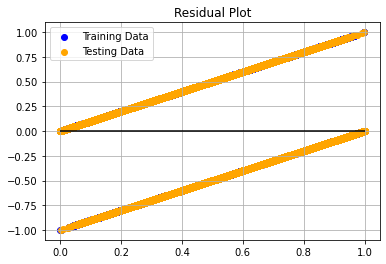

In [24]:
# make a scatter plot of the two data sets to see how close they are to each other
import matplotlib.pyplot as plt

plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_categorical, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_categorical, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_categorical.min(), xmax=y_test_categorical.max())
plt.title("Residual Plot")
plt.grid()
plt.savefig("residual.png")
plt.show()